In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#Load the data and store the data into a data frame
data = pd.read_csv('TSLA Training.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-22,23.436001,23.483334,22.133333,22.242001,22.242001,153991500
1,2018-06-25,22.007999,22.564667,21.833332,22.200666,22.200666,103969500
2,2018-06-26,22.403334,22.903334,21.719999,22.799999,22.799999,111787500
3,2018-06-27,23.000000,23.386000,22.633333,22.966667,22.966667,125005500
4,2018-06-28,23.243999,23.801332,23.073999,23.328667,23.328667,125970000


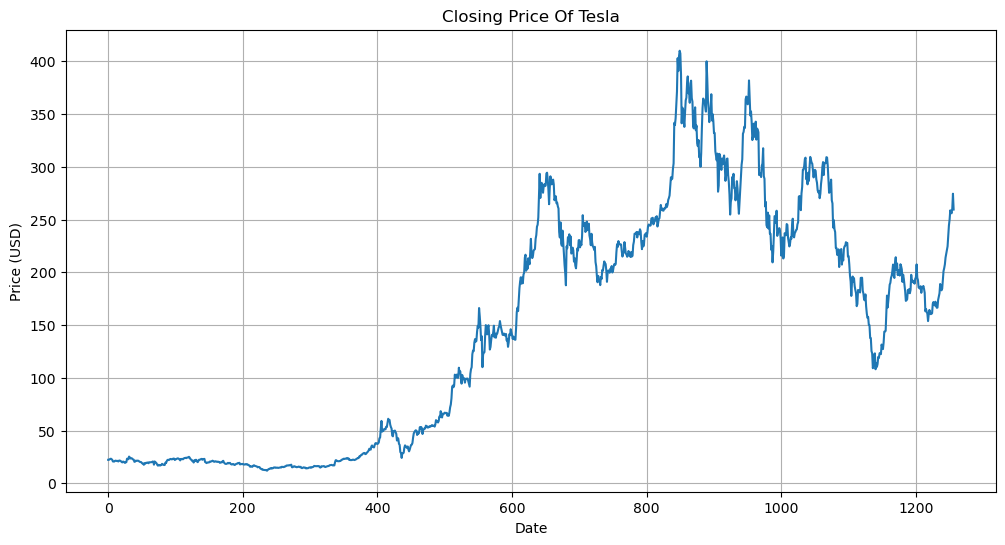

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title("Closing Price Of Tesla")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [4]:
#Spliting the dataset into training (70%) and testing (30%) set
#Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(879, 7)
(378, 7)


In [5]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [6]:
#Using MinMax scaler for normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403451],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407136],
       [0.02426565],
       [0.02365934],
       [0.02254555],
       [0.02080702],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995953],
       [0.02041175],
       [0.02856842],
       [0.02833895],
       [0.02730388],
       [0.03359808],
       [0.03205216],
       [0.02905581],
       [0.02956497],
       [0.02971906],
       [0.02825019],
       [0.02675117],
       [0.02620851],
       [0.02119225],
       [0.02168466],
       [0.02393905],
       [0.0238955 ],
       [0.02363757],
       [0.02409314],
       [0.02349855],
       [0.02225747],
       [0.021

In [8]:
x_train = []
y_train = [] 

for i in range(60, data_training_array.shape[0]):
    x_train.append(data_training_array[i-60: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(819, 60, 1)

In [10]:
#Model building(LSTM)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [11]:
#Model building(LSTM)
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu' , return_sequences=False ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ghosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Training the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history = model.fit(x_train, y_train,epochs = 100,batch_size = 32)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - loss: 0.0831 - mean_absolute_error: 0.1968
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 0.0162 - mean_absolute_error: 0.0887
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0090 - mean_absolute_error: 0.0600
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - loss: 0.0067 - mean_absolute_error: 0.0514
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0061 - mean_absolute_error: 0.0478
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0066 - mean_absolute_error: 0.0502
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0061 - mean_absolute_error: 0.0475
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0049 - mean_absolute_error: 0.0444
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0056 - mean_absolute_error: 0.0465
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0054 - mean_absolute_error: 0.0451
Epoch 11/100
26/26

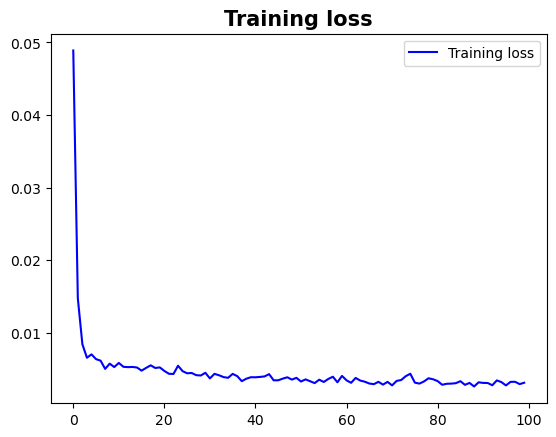

<Figure size 640x480 with 0 Axes>

In [14]:
#plotting loss,it show that loss has decreased significantly any model trained well
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [15]:
past_60_days = pd.DataFrame(train_close[-60:])

In [16]:
test_df = pd.DataFrame(test_close)

In [17]:
final_data = pd.concat([past_60_days, test_df], ignore_index=True)

In [18]:
final_data.head()

,0
0,251.213333
1,258.130005
2,263.786682
3,259.186676
4,260.436676


In [19]:
input_data = scaler.fit_transform(final_data)

In [20]:
input_data.shape

(438, 1)

In [21]:
#Testing the model
x_test = []
y_test = []
for i in range(60, input_data.shape[0]):
   x_test.append(input_data[i-60: i])
   y_test.append(input_data[i, 0])

In [22]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 60, 1)
(378,)


In [23]:
y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step


In [24]:
y_pred.shape

(378, 1)

In [25]:
y_test

array([0.67166879, 0.63563789, 0.67824998, 0.75592145, 0.82011017,
       0.84985811, 0.84381798, 0.84130031, 0.82379832, 0.80882502,
       0.9667296 , 0.91130836, 0.84343149, 0.81757046, 0.77589693,
       0.81030465, 0.81723917, 0.86341799, 0.78097636, 0.80090766,
       0.77981689, 0.74132352, 0.74200814, 0.68417972, 0.66883095,
       0.6560219 , 0.67701329, 0.55741435, 0.57646228, 0.67625133,
       0.6702112 , 0.64195401, 0.62592063, 0.66145475, 0.64380911,
       0.65999716, 0.67103937, 0.64072834, 0.59153495, 0.60893767,
       0.66047191, 0.66153199, 0.60958913, 0.58820023, 0.5490553 ,
       0.48557324, 0.52613158, 0.53618003, 0.60305211, 0.59636043,
       0.61349807, 0.56866643, 0.56756217, 0.53033865, 0.55222443,
       0.59039764, 0.56757319, 0.52014665, 0.48814611, 0.52736828,
       0.56970438, 0.60434401, 0.64165588, 0.65906962, 0.73947944,
       0.74514421, 0.76149776, 0.75787592, 0.84753919, 0.85607495,
       0.84991331, 0.83181506, 0.83953357, 0.90673694, 0.84689

In [26]:
scaler.scale_

array([0.00331268])

In [27]:
scale_factor = 1/0.00331268
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

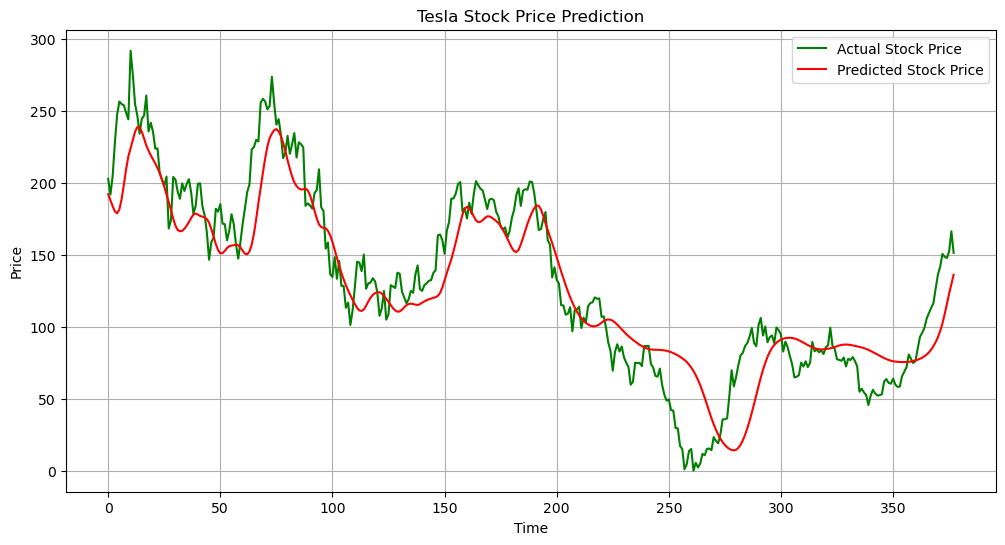

In [28]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Actual Stock Price")
plt.plot(y_pred, 'r', label = "Predicted Stock Price")
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [30]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 60
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 9.53%


In [31]:
# Calculate Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 718.730534506682


In [32]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.828401579523637


In [33]:
Pred = model.predict(x_test)
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


102.31136397506226

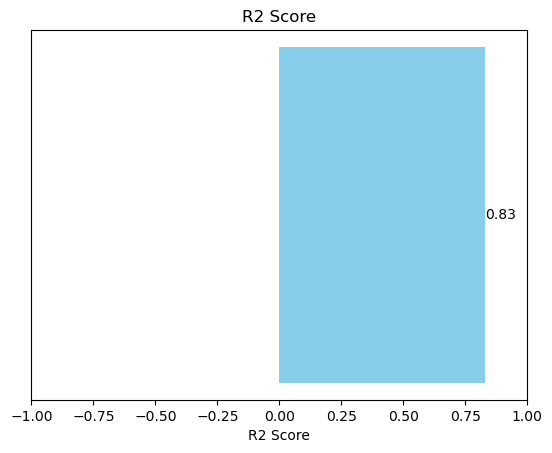

In [34]:
#Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

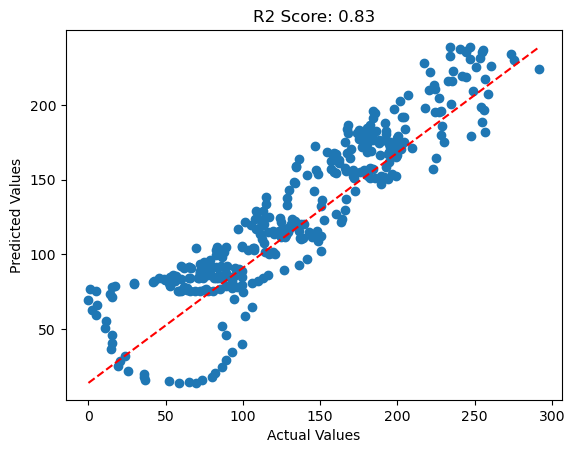

In [35]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()